In [ ]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


In [ ]:
# OWD Defn

data = LymeData({CHRONIC, NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_OWD, drop_99=True)
data.drop_one_label(NON_NEURO) # SINGLE LABEL

print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': range(2,7),'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)


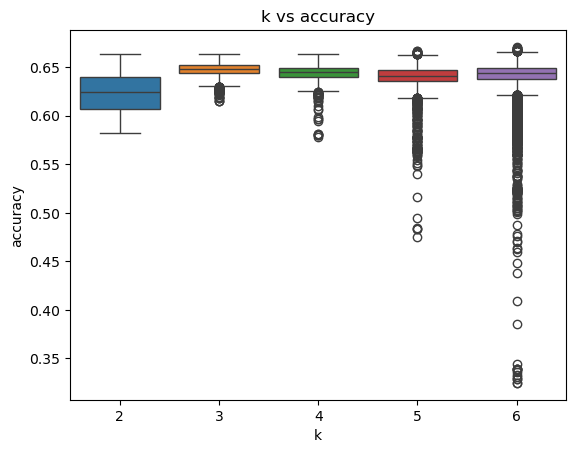

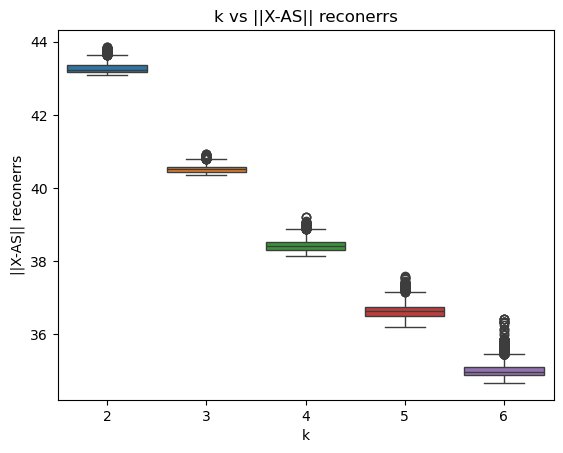

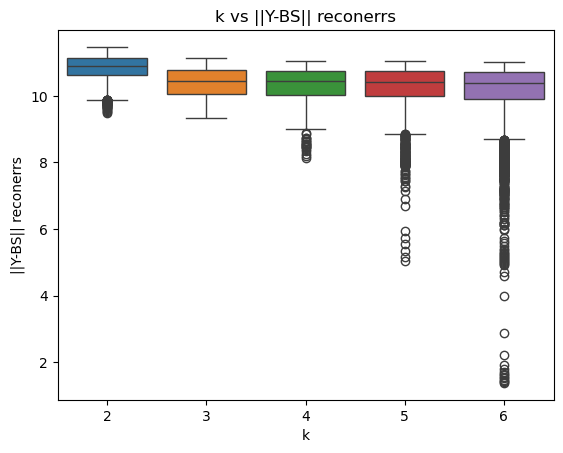

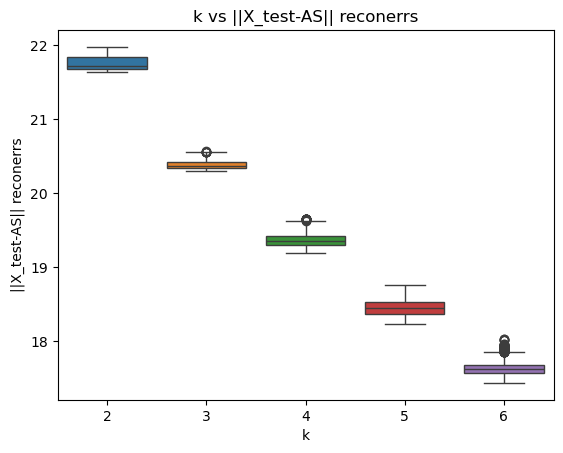

OWD Working Definition: Neuro vs Non-Neuro
best accuracy:  0.6708713272543061  best params:  {'k': 6, 'lambda': 0.7575757575757577, 'random_state': 20}
test_accuracy:  (0.6136363636363636, 19.29057640602161)


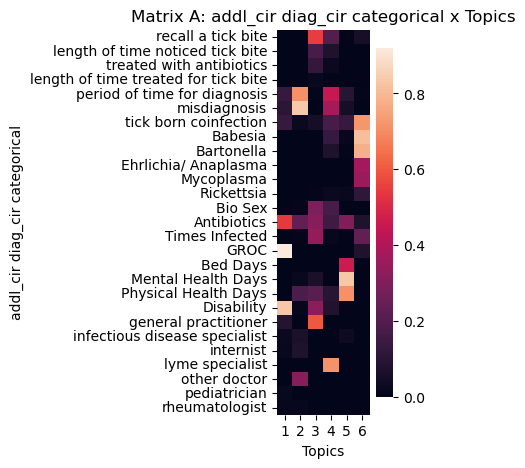

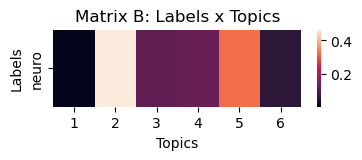

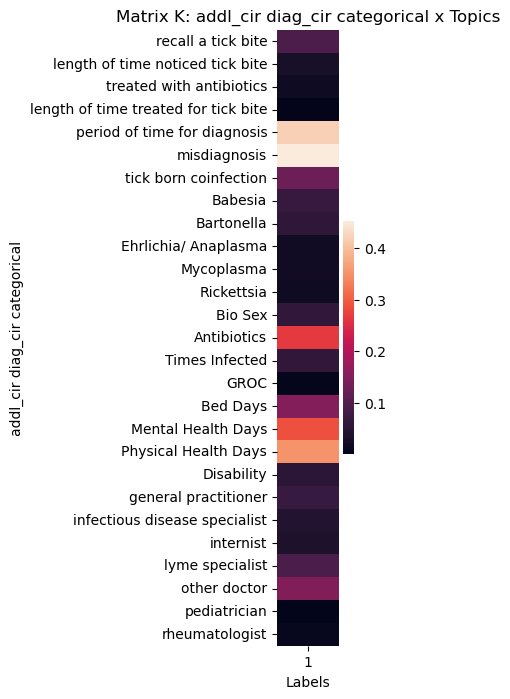

In [9]:

display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(Xtestreconerr_distr, ylabel='||X_test-AS|| reconerrs')

print('OWD Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394

In [10]:
accu_distr.to_csv('OWD_NvN_Cr_Hs_k2-6_l1_r100_Accu.csv', index=False)
Xreconerr_distr.to_csv('OWD_NvN_Cr_Hs_k2-6_l1_r100_Xrec.csv', index=False)
Yreconerr_distr.to_csv('OWD_NvN_Cr_Hs_k2-6_l1_r100_Yrec.csv', index=False)
Xtestreconerr_distr.to_csv('OWD_NvN_Cr_Hs_k2-6_l1_r100_XCVrec.csv', index=False)

In [11]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
2    0.622861
3    0.647286
4    0.644268
5    0.640392
6    0.640700
dtype: float64
IQR:
2    0.032756
3    0.008561
4    0.009929
5    0.011368
6    0.011337
dtype: float64


In [12]:
# Xreconerr distribution statistics
mean = Xreconerr_distr.mean()
Q1 = Xreconerr_distr.quantile(0.25)
Q3 = Xreconerr_distr.quantile(0.75)
print('Mean Xreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xreconerr_distr:
2    43.280159
3    40.514873
4    38.423574
5    36.621295
6    35.001325
dtype: float64
IQR:
2    0.192922
3    0.142076
4    0.226010
5    0.268086
6    0.229057
dtype: float64


In [13]:
# Yreconerr distribution statistics
mean = Yreconerr_distr.mean()
Q1 = Yreconerr_distr.quantile(0.25)
Q3 = Yreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
2    10.847289
3    10.394573
4    10.369182
5    10.320480
6    10.191177
dtype: float64
IQR:
2    0.501567
3    0.713389
4    0.712429
5    0.749367
6    0.811875
dtype: float64


In [14]:
# Xtestreconerr distribution statistics
mean = Xtestreconerr_distr.mean()
Q1 = Xtestreconerr_distr.quantile(0.25)
Q3 = Xtestreconerr_distr.quantile(0.75)
print('Mean Xtestreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xtestreconerr_distr:
2    21.755455
3    20.381692
4    19.363572
5    18.448723
6    17.637201
dtype: float64
IQR:
2    0.162242
3    0.086920
4    0.132550
5    0.161709
6    0.112149
dtype: float64
